# **Introduction**

Bellabeat is a pioneering provider of health-centric products designed for women, including the Bellabeat app, Leaf, Time, Spring, and Bellabeat membership. Established in 2013 by Urška Sršen and Sando Mur, the company has exhibited remarkable success and holds substantial potential to solidify its presence in the global smart device industry. The founders believe that harnessing insights from fitness data collected by smart devices could pave the way for new avenues of growth.

Within this case study, I will meticulously traverse the six stages of the data analysis process—namely, ask, prepare, process, analyze, share, and act—to elucidate the approach I undertook to dissect FitBit fitness Tracker Data. My objective is to unearth valuable insights that can be leveraged for the benefit of Bellabeat's endeavors.

# **1.Ask**
**Key Stakeholders**
* Urška Sršen: Co-founder and Chief Creative Officer at Bellabeat.
* Sando Mur: Co-founder and a pivotal member of Bellabeat's executive team.
* Bellabeat's Marketing Analytics Team: A dedicated group of data analysts responsible for gathering, analyzing, and presenting data that informs  Bellabeat's marketing strategies.
* Customers: Individuals who purchase Bellabeat's products or avail their services.

**Business Task**
* The goal is to analyze FitBit Fitness Tracker Data from a set of thirty eligible FitBit users, aiming to uncover insights that can catalyze fresh growth opportunities for the company.
* The focus is on comprehending user behavior related to one of Bellabeat's products by dissecting smart device data.
* This case study specifically centers on the Bellabeat membership program—a subscription-based initiative providing users with personalized guidance on nutrition, activity, sleep, health, beauty, and mindfulness in alignment with their individual lifestyles and objectives.

# **2.Prepare**
**Data Source**
* The dataset originates from Mobius and is freely available. It encompasses personal fitness tracker data sourced from over thirty FitBit users who have granted consent for its usage.
* The dataset consists of 18 CSV files, and the relevant datasets for the selected product analysis are daily activity, hourly calories, hourly steps, and sleep day datasets.

**Data Examination and Organization**
* A preliminary overview was performed by opening the datasets in Google Sheets, revealing the long-format arrangement of data.
* The dailyActivity_merged dataset provides crucial metrics such as total steps, active minutes, and calories burned, offering avenues for exploring correlations between these variables.
* Hourly calories and hourly steps datasets furnish insights about activity patterns and calorie expenditure over different times of the day.
* Files were stored in a separate desktop folder to facilitate processing using Python and Jupyter Notebook.

**Data Credibility**
* Meeting the "Large Enough Sample Condition," the sample size of 33 FitBit users ensures meaningful insights with potential for generalization.
* Data recency within the past 10 years maintains relevance.
* The dataset is aligned with Bellabeat's products, allowing potential applications of analysis results to their offerings.
* Despite being third-party data, its quality and reliability are sound, with known sourcing that does not raise concerns.

# **3.Process**
Let's start by loading the libraries we need for processing and visualizing the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime as dt

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


After importing all the necessary libraries, we will import the datasets.

In [2]:
daily_activity = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyActivity_merged.csv")
daily_intensity = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyIntensities_merged.csv")
daily_calories = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailyCalories_merged.csv")
daily_steps = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/dailySteps_merged.csv")
hourly_steps = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlySteps_merged.csv")
hourly_calories = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/hourlyCalories_merged.csv")
heartrate_secs = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/heartrate_seconds_merged.csv")
sleepday = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/sleepDay_merged.csv")
weight_log = pd.read_csv("/kaggle/input/fitbit/Fitabase Data 4.12.16-5.12.16/weightLogInfo_merged.csv")


After loading the dataset, we will perform exploratory data analysis. This step involves analyzing and understanding the dataset's structure, patterns, and characteristics.

# **Exploratory data analysis**
We will initiate the exploratory data analysis process by retrieving the first 5 rows of each dataset. This will allow us to obtain a glimpse of the data's structure and the values it contains. 

In [3]:
daily_activity.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories
0,1503960366,4/12/2016,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985
1,1503960366,4/13/2016,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797
2,1503960366,4/14/2016,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776
3,1503960366,4/15/2016,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745
4,1503960366,4/16/2016,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863


In [4]:
daily_intensity.head(5)

,Id,ActivityDay,SedentaryMinutes,LightlyActiveMinutes,FairlyActiveMinutes,VeryActiveMinutes,SedentaryActiveDistance,LightActiveDistance,ModeratelyActiveDistance,VeryActiveDistance
0,1503960366,4/12/2016,728,328,13,25,0.0,6.06,0.55,1.88
1,1503960366,4/13/2016,776,217,19,21,0.0,4.71,0.69,1.57
2,1503960366,4/14/2016,1218,181,11,30,0.0,3.91,0.40,2.44
3,1503960366,4/15/2016,726,209,34,29,0.0,2.83,1.26,2.14
4,1503960366,4/16/2016,773,221,10,36,0.0,5.04,0.41,2.71


In [5]:
daily_calories.head(5)

,Id,ActivityDay,Calories
0,1503960366,4/12/2016,1985
1,1503960366,4/13/2016,1797
2,1503960366,4/14/2016,1776
3,1503960366,4/15/2016,1745
4,1503960366,4/16/2016,1863


In [6]:
hourly_steps.head(5)

,Id,ActivityHour,StepTotal
0,1503960366,4/12/2016 12:00:00 AM,373
1,1503960366,4/12/2016 1:00:00 AM,160
2,1503960366,4/12/2016 2:00:00 AM,151
3,1503960366,4/12/2016 3:00:00 AM,0
4,1503960366,4/12/2016 4:00:00 AM,0


In [7]:
hourly_calories.head(5)

,Id,ActivityHour,Calories
0,1503960366,4/12/2016 12:00:00 AM,81
1,1503960366,4/12/2016 1:00:00 AM,61
2,1503960366,4/12/2016 2:00:00 AM,59
3,1503960366,4/12/2016 3:00:00 AM,47
4,1503960366,4/12/2016 4:00:00 AM,48


In [8]:
heartrate_secs.head(5)

,Id,Time,Value
0,2022484408,4/12/2016 7:21:00 AM,97
1,2022484408,4/12/2016 7:21:05 AM,102
2,2022484408,4/12/2016 7:21:10 AM,105
3,2022484408,4/12/2016 7:21:20 AM,103
4,2022484408,4/12/2016 7:21:25 AM,101


In [9]:
sleepday.head(5)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,4/12/2016 12:00:00 AM,1,327,346
1,1503960366,4/13/2016 12:00:00 AM,2,384,407
2,1503960366,4/15/2016 12:00:00 AM,1,412,442
3,1503960366,4/16/2016 12:00:00 AM,2,340,367
4,1503960366,4/17/2016 12:00:00 AM,1,700,712


In [10]:
weight_log.head(5)

,Id,Date,WeightKg,WeightPounds,Fat,BMI,IsManualReport,LogId
0,1503960366,5/2/2016 11:59:59 PM,52.599998,115.963147,22.0,22.650000,True,1462233599000
1,1503960366,5/3/2016 11:59:59 PM,52.599998,115.963147,NaN,22.650000,True,1462319999000
2,1927972279,4/13/2016 1:08:52 AM,133.500000,294.317120,NaN,47.540001,False,1460509732000
3,2873212765,4/21/2016 11:59:59 PM,56.700001,125.002104,NaN,21.450001,True,1461283199000
4,2873212765,5/12/2016 11:59:59 PM,57.299999,126.324875,NaN,21.690001,True,1463097599000


Now, we'll use the .info() method to learn about missing data and the type of information in each column. This will help us understand the data better and decide how to work with it effectively.

In [11]:
daily_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 15 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDate              940 non-null    object 
 2   TotalSteps                940 non-null    int64  
 3   TotalDistance             940 non-null    float64
 4   TrackerDistance           940 non-null    float64
 5   LoggedActivitiesDistance  940 non-null    float64
 6   VeryActiveDistance        940 non-null    float64
 7   ModeratelyActiveDistance  940 non-null    float64
 8   LightActiveDistance       940 non-null    float64
 9   SedentaryActiveDistance   940 non-null    float64
 10  VeryActiveMinutes         940 non-null    int64  
 11  FairlyActiveMinutes       940 non-null    int64  
 12  LightlyActiveMinutes      940 non-null    int64  
 13  SedentaryMinutes          940 non-null    int64  
 14  Calories  

In [12]:
daily_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   Calories     940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [13]:
daily_intensity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Id                        940 non-null    int64  
 1   ActivityDay               940 non-null    object 
 2   SedentaryMinutes          940 non-null    int64  
 3   LightlyActiveMinutes      940 non-null    int64  
 4   FairlyActiveMinutes       940 non-null    int64  
 5   VeryActiveMinutes         940 non-null    int64  
 6   SedentaryActiveDistance   940 non-null    float64
 7   LightActiveDistance       940 non-null    float64
 8   ModeratelyActiveDistance  940 non-null    float64
 9   VeryActiveDistance        940 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 73.6+ KB


In [14]:
daily_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 940 entries, 0 to 939
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Id           940 non-null    int64 
 1   ActivityDay  940 non-null    object
 2   StepTotal    940 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 22.2+ KB


In [15]:
hourly_steps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   StepTotal     22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [16]:
hourly_calories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22099 entries, 0 to 22098
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Id            22099 non-null  int64 
 1   ActivityHour  22099 non-null  object
 2   Calories      22099 non-null  int64 
dtypes: int64(2), object(1)
memory usage: 518.1+ KB


In [17]:
heartrate_secs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2483658 entries, 0 to 2483657
Data columns (total 3 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   Id      int64 
 1   Time    object
 2   Value   int64 
dtypes: int64(2), object(1)
memory usage: 56.8+ MB


In [18]:
sleepday.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 413 entries, 0 to 412
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Id                  413 non-null    int64 
 1   SleepDay            413 non-null    object
 2   TotalSleepRecords   413 non-null    int64 
 3   TotalMinutesAsleep  413 non-null    int64 
 4   TotalTimeInBed      413 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 16.3+ KB


In [19]:
weight_log.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 67 entries, 0 to 66
Data columns (total 8 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Id              67 non-null     int64  
 1   Date            67 non-null     object 
 2   WeightKg        67 non-null     float64
 3   WeightPounds    67 non-null     float64
 4   Fat             2 non-null      float64
 5   BMI             67 non-null     float64
 6   IsManualReport  67 non-null     bool   
 7   LogId           67 non-null     int64  
dtypes: bool(1), float64(4), int64(2), object(1)
memory usage: 3.9+ KB


Next, let's see how many **unique users** are in each dataset. 

In [20]:
print("daily_activity has",daily_activity["Id"].nunique(), "unique users" )
print("daily_calories has",daily_calories["Id"].nunique(), "unique users" )
print("daily_intensity has",daily_intensity["Id"].nunique(), "unique users" )
print("daily_steps has",daily_steps["Id"].nunique(), "unique users" )
print("hourly_steps has",hourly_steps["Id"].nunique(), "unique users" )
print("hourly_calories has",hourly_calories["Id"].nunique(), "unique users" )
print("heartrate_secs has",heartrate_secs["Id"].nunique(), "unique users" )
print("sleepday has",sleepday["Id"].nunique(), "unique users" )
print("hourly_calories has",hourly_calories["Id"].nunique(), "unique users" )
print("weight_log has",weight_log["Id"].nunique(), "unique users" )




daily_activity has 33 unique users
daily_calories has 33 unique users
daily_intensity has 33 unique users
daily_steps has 33 unique users
hourly_steps has 33 unique users
hourly_calories has 33 unique users
heartrate_secs has 14 unique users
sleepday has 24 unique users
hourly_calories has 33 unique users
weight_log has 8 unique users


Next, let's see how many **duplicate** values are in each dataset.

In [21]:
print("daily_activity has",daily_activity.duplicated().sum(), "duplicate values" )
print("daily_calories has",daily_calories.duplicated().sum(), "duplicate values"  )
print("daily_intensity has",daily_intensity.duplicated().sum(), "duplicate values" )
print("daily_steps has",daily_steps.duplicated().sum(), "duplicate values"  )
print("hourly_steps has",hourly_steps.duplicated().sum(), "duplicate values"  )
print("hourly_calories has",hourly_calories.duplicated().sum(), "duplicate values"  )
print("heartrate_secs has",heartrate_secs.duplicated().sum(), "duplicate values" )
print("sleepday has",sleepday.duplicated().sum(), "duplicate values"  )
print("hourly_calories has",hourly_calories.duplicated().sum(), "duplicate values"  )
print("weight_log has",weight_log.duplicated().sum(), "duplicate values"  )

daily_activity has 0 duplicate values
daily_calories has 0 duplicate values
daily_intensity has 0 duplicate values
daily_steps has 0 duplicate values
hourly_steps has 0 duplicate values
hourly_calories has 0 duplicate values
heartrate_secs has 0 duplicate values
sleepday has 3 duplicate values
hourly_calories has 0 duplicate values
weight_log has 0 duplicate values


#  **Datasets Inspection**:
* After inspecting various datasets, "heartrate_secs," "weight_logged," and "sleepday" did not meet the n>=30 rule.
We will drop "heartrate_secs" (n=14) and "weight_logged" (n=8), while keeping "sleepday" (n=24) due to potential insights.
* Furthermore"daily_calories," "daily_intensity," and "daily_steps" repeat the same data as "daily_activity," with minor column name variations. These will be discarded, leaving "daily_activity," "hourly_steps," "hourly_calories," and "sleepday" datasets.
#  **Structure Observations**:
* "hourly_steps" and "hourly_calories" share a similar structure (22099, 3), suggesting a merge possibility.
#  **Data Type Enhancement**:
* Columns such as "ActivityDate" in "daily_activity," "ActivityHour" in "hourly_steps" and "hourly_calories," and "SleepDay" in "sleepday" are labeled as objects but should be converted to datetime for streamlined processing.
#  **Data Quality**:
* Notably, there are no missing values or duplicates(with 3 exception in sleepday dataset) in any of the datasets.
#  **Key Insights**:
* "daily_activity" is a comprehensive dataframe resulting from merging other datasets.
* "sleepday" is valuable despite its smaller size (n=24).
* Addressing data types and potential merges will enhance analysis efficiency.

# **DATA TRANSFORMATION**

Converting the "ActivityDate” in daily_activity, “ActivityHour” in hourly_steps, “ActivityHour” in hourly_calories, and “SleepDay” in sleepday to datetime

In [22]:
daily_activity["ActivityDate"] = pd.to_datetime(daily_activity["ActivityDate"])
hourly_steps["ActivityHour"] = pd.to_datetime(hourly_steps["ActivityHour"])
hourly_calories["ActivityHour"] = pd.to_datetime(hourly_calories["ActivityHour"])
sleepday["SleepDay"] = pd.to_datetime(sleepday["SleepDay"])

Now, let's check if the data types got changed...

In [23]:
print("Data type of daily_activity[ActivityDate]  is", daily_activity["ActivityDate"].dtypes)
print("Data type of hourly_steps[ActivityHour]    is", hourly_steps["ActivityHour"].dtypes)
print("Data type of hourly_calories[ActivityHour] is", hourly_calories["ActivityHour"].dtypes)
print("Data type of sleepday[SleepDay]            is",sleepday["SleepDay"].dtypes)

Data type of daily_activity[ActivityDate]  is datetime64[ns]
Data type of hourly_steps[ActivityHour]    is datetime64[ns]
Data type of hourly_calories[ActivityHour] is datetime64[ns]
Data type of sleepday[SleepDay]            is datetime64[ns]


All of our dataframes are now in correct datatypes

# **Merging hourly_steps and hourly_calories DataFrame**
"We've observed through the .info() method that these two DataFrames share the same shape and include common columns 'Id' and 'ActivityHour'. Given this, it's appropriate to perform a join operation to merge them together."

In [24]:
hourly_merged = pd.merge(hourly_steps, hourly_calories, on = ['Id', 'ActivityHour'], how = 'inner')
hourly_merged.info()
hourly_merged.head(5)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Id            22099 non-null  int64         
 1   ActivityHour  22099 non-null  datetime64[ns]
 2   StepTotal     22099 non-null  int64         
 3   Calories      22099 non-null  int64         
dtypes: datetime64[ns](1), int64(3)
memory usage: 863.2 KB


,Id,ActivityHour,StepTotal,Calories
0,1503960366,2016-04-12 00:00:00,373,81
1,1503960366,2016-04-12 01:00:00,160,61
2,1503960366,2016-04-12 02:00:00,151,59
3,1503960366,2016-04-12 03:00:00,0,47
4,1503960366,2016-04-12 04:00:00,0,48


Now we have to work with three Dataframes which are hourly_merged, daily_activity, and sleepday

# **Creating new columns**
In this step, we will utilize the **.dt.day_name()** function from pandas to extract the day of the week from the "**ActivityDate**" column in the "**daily_activity**" DataFrame, and from the "**ActivityHour**" column in "**hourly_merged**" DataFrame, and "**SleepDay**" from **sleepday** DataFrame. We'll then create a new column named "**Day_of_the_week**" in each respective DataFrame to examine whether the days of the week have any impact on our analysis.

In [25]:
daily_activity["Day_of_the_week"] = daily_activity["ActivityDate"].dt.day_name()
hourly_merged["Day_of_the_week"]  = hourly_merged["ActivityHour"].dt.day_name()
sleepday["Day_of_the_week"]       = sleepday["SleepDay"].dt.day_name()

In [26]:
daily_activity.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day_of_the_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday


In [27]:
sleepday.head(5)

,Id,SleepDay,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day_of_the_week
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [28]:
hourly_merged.head(5)

,Id,ActivityHour,StepTotal,Calories,Day_of_the_week
0,1503960366,2016-04-12 00:00:00,373,81,Tuesday
1,1503960366,2016-04-12 01:00:00,160,61,Tuesday
2,1503960366,2016-04-12 02:00:00,151,59,Tuesday
3,1503960366,2016-04-12 03:00:00,0,47,Tuesday
4,1503960366,2016-04-12 04:00:00,0,48,Tuesday


After extracting the day_of_tyhe_week. we are going to extract the "hour" and "date" using dt.hour and dt.date respectively from hourly_merged DataFrame.

In [29]:
hourly_merged["hour"] = hourly_merged["ActivityHour"].dt.hour
hourly_merged["date"] = hourly_merged["ActivityHour"].dt.date

In [30]:
hourly_merged.head(5)

,Id,ActivityHour,StepTotal,Calories,Day_of_the_week,hour,date
0,1503960366,2016-04-12 00:00:00,373,81,Tuesday,0,2016-04-12
1,1503960366,2016-04-12 01:00:00,160,61,Tuesday,1,2016-04-12
2,1503960366,2016-04-12 02:00:00,151,59,Tuesday,2,2016-04-12
3,1503960366,2016-04-12 03:00:00,0,47,Tuesday,3,2016-04-12
4,1503960366,2016-04-12 04:00:00,0,48,Tuesday,4,2016-04-12


Now that we have extracted the Day_of_the_week, date and hour. we are going to drop the ActivityHour for our hourly_merged DF

In [31]:
hourly_merged = hourly_merged.drop("ActivityHour", axis = 1)

In [32]:
hourly_merged.head(5)

,Id,StepTotal,Calories,Day_of_the_week,hour,date
0,1503960366,373,81,Tuesday,0,2016-04-12
1,1503960366,160,61,Tuesday,1,2016-04-12
2,1503960366,151,59,Tuesday,2,2016-04-12
3,1503960366,0,47,Tuesday,3,2016-04-12
4,1503960366,0,48,Tuesday,4,2016-04-12


In [33]:
hourly_merged.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 22099 entries, 0 to 22098
Data columns (total 6 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Id               22099 non-null  int64 
 1   StepTotal        22099 non-null  int64 
 2   Calories         22099 non-null  int64 
 3   Day_of_the_week  22099 non-null  object
 4   hour             22099 non-null  int64 
 5   date             22099 non-null  object
dtypes: int64(4), object(2)
memory usage: 1.2+ MB


As we can see that we need to change the datatype of date colum

In [34]:
hourly_merged["date"] = pd.to_datetime(hourly_merged["date"])

In [35]:
print("Data type of hourly_merged[date] is", hourly_merged["date"].dtypes)

Data type of hourly_merged[date] is datetime64[ns]


# **Merging hourly_merged with sleepday**
Before we merge these two to perform our analysis, we need to change the column name sleepday["SleepDay"] to sleepday["date"] so, we can perform merge on date column. As hourly_merged and sleepday DataFrames will  have date column in common. 

In [36]:
sleepday = sleepday.rename(columns = {"SleepDay" : "date"})
sleepday.head(5)

,Id,date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed,Day_of_the_week
0,1503960366,2016-04-12,1,327,346,Tuesday
1,1503960366,2016-04-13,2,384,407,Wednesday
2,1503960366,2016-04-15,1,412,442,Friday
3,1503960366,2016-04-16,2,340,367,Saturday
4,1503960366,2016-04-17,1,700,712,Sunday


In [37]:
sleepday.columns

Index(['Id', 'date', 'TotalSleepRecords', 'TotalMinutesAsleep',
       'TotalTimeInBed', 'Day_of_the_week'],
      dtype='object')

In [38]:
hourly_merged.columns

Index(['Id', 'StepTotal', 'Calories', 'Day_of_the_week', 'hour', 'date'], dtype='object')

Now lets perform the merge on similar columns

In [39]:
sleep_hourly_merged = pd.merge(hourly_merged,sleepday, on = ['Id','date','Day_of_the_week'], 
                               how = "inner")

In [40]:
sleep_hourly_merged.head(5)

,Id,StepTotal,Calories,Day_of_the_week,hour,date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,373,81,Tuesday,0,2016-04-12,1,327,346
1,1503960366,160,61,Tuesday,1,2016-04-12,1,327,346
2,1503960366,151,59,Tuesday,2,2016-04-12,1,327,346
3,1503960366,0,47,Tuesday,3,2016-04-12,1,327,346
4,1503960366,0,48,Tuesday,4,2016-04-12,1,327,346


In [41]:
sleep_hourly_merged.head(-5)

,Id,StepTotal,Calories,Day_of_the_week,hour,date,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
0,1503960366,373,81,Tuesday,0,2016-04-12,1,327,346
1,1503960366,160,61,Tuesday,1,2016-04-12,1,327,346
2,1503960366,151,59,Tuesday,2,2016-04-12,1,327,346
3,1503960366,0,47,Tuesday,3,2016-04-12,1,327,346
4,1503960366,0,48,Tuesday,4,2016-04-12,1,327,346
...,...,...,...,...,...,...,...,...,...
9761,8792009665,105,86,Wednesday,14,2016-05-04,1,439,463
9762,8792009665,559,129,Wednesday,15,2016-05-04,1,439,463
9763,8792009665,0,70,Wednesday,16,2016-05-04,1,439,463
9764,8792009665,366,120,Wednesday,17,2016-05-04,1,439,463


After creating the new Dataframe we are going to take a look at how many missing value and unique values are present in our DF

In [42]:
print("Total number of missing values",sleep_hourly_merged.isna().values.sum())
print("Total number of unique values",sleep_hourly_merged["Id"].nunique())

Total number of missing values 0
Total number of unique values 24


Now that we are done cleaning our sleep_hourly_merged DataFrame. lets take a look what changes we can do to daily_activity DataFrame

In [43]:
daily_activity.head(10)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day_of_the_week
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday
5,1503960366,2016-04-17,9705,6.48,6.48,0.0,3.19,0.78,2.51,0.0,38,20,164,539,1728,Sunday
6,1503960366,2016-04-18,13019,8.59,8.59,0.0,3.25,0.64,4.71,0.0,42,16,233,1149,1921,Monday
7,1503960366,2016-04-19,15506,9.88,9.88,0.0,3.53,1.32,5.03,0.0,50,31,264,775,2035,Tuesday
8,1503960366,2016-04-20,10544,6.68,6.68,0.0,1.96,0.48,4.24,0.0,28,12,205,818,1786,Wednesday
9,1503960366,2016-04-21,9819,6.34,6.34,0.0,1.34,0.35,4.65,0.0,19,8,211,838,1775,Thursday


Let's start by making some new columns in our DataFrame to summarize Minutes

In [44]:
daily_activity["TotalMinutes"] = daily_activity["VeryActiveMinutes"]+\
                                 daily_activity["FairlyActiveMinutes"]+\
                                 daily_activity["LightlyActiveMinutes"]+\
                                 daily_activity["SedentaryMinutes"]

In [45]:
 daily_activity["TotalActiveMinutes"] = daily_activity["VeryActiveMinutes"]+\
                                        daily_activity["FairlyActiveMinutes"]+\
                                        daily_activity["LightlyActiveMinutes"]
                                

In [46]:
daily_activity["TotalActiveHour"] = round(daily_activity["TotalActiveMinutes"] / 60)

In [47]:
daily_activity[["TotalMinutes","TotalActiveMinutes", "TotalActiveHour"]].head()

,TotalMinutes,TotalActiveMinutes,TotalActiveHour
0,1094,366,6.0
1,1033,257,4.0
2,1440,222,4.0
3,998,272,5.0
4,1040,267,4.0


In [48]:
daily_activity.head(5)

,Id,ActivityDate,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,Day_of_the_week,TotalMinutes,TotalActiveMinutes,TotalActiveHour
0,1503960366,2016-04-12,13162,8.50,8.50,0.0,1.88,0.55,6.06,0.0,25,13,328,728,1985,Tuesday,1094,366,6.0
1,1503960366,2016-04-13,10735,6.97,6.97,0.0,1.57,0.69,4.71,0.0,21,19,217,776,1797,Wednesday,1033,257,4.0
2,1503960366,2016-04-14,10460,6.74,6.74,0.0,2.44,0.40,3.91,0.0,30,11,181,1218,1776,Thursday,1440,222,4.0
3,1503960366,2016-04-15,9762,6.28,6.28,0.0,2.14,1.26,2.83,0.0,29,34,209,726,1745,Friday,998,272,5.0
4,1503960366,2016-04-16,12669,8.16,8.16,0.0,2.71,0.41,5.04,0.0,36,10,221,773,1863,Saturday,1040,267,4.0


# **4.Analyze**

Great! we cleaned our DataFrames, and now it's time to analyze these to find valuable insights.
we have three DataFrame:
* daily_activity
* hourly_merged
* sleep_hourly_merged

We are going to start analyzing these DataFrames by finding some summary statistics first.

In [49]:
daily_activity.describe()

,Id,TotalSteps,TotalDistance,TrackerDistance,LoggedActivitiesDistance,VeryActiveDistance,ModeratelyActiveDistance,LightActiveDistance,SedentaryActiveDistance,VeryActiveMinutes,FairlyActiveMinutes,LightlyActiveMinutes,SedentaryMinutes,Calories,TotalMinutes,TotalActiveMinutes,TotalActiveHour
count,9.400000e+02,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000,940.000000
mean,4.855407e+09,7637.910638,5.489702,5.475351,0.108171,1.502681,0.567543,3.340819,0.001606,21.164894,13.564894,192.812766,991.210638,2303.609574,1218.753191,227.542553,3.775532
std,2.424805e+09,5087.150742,3.924606,3.907276,0.619897,2.658941,0.883580,2.040655,0.007346,32.844803,19.987404,109.174700,301.267437,718.166862,265.931767,121.776307,2.057646
min,1.503960e+09,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.000000,0.000000
25%,2.320127e+09,3789.750000,2.620000,2.620000,0.000000,0.000000,0.000000,1.945000,0.000000,0.000000,0.000000,127.000000,729.750000,1828.500000,989.750000,146.750000,2.000000
50%,4.445115e+09,7405.500000,5.245000,5.245000,0.000000,0.210000,0.240000,3.365000,0.000000,4.000000,6.000000,199.000000,1057.500000,2134.000000,1440.000000,247.000000,4.000000
75%,6.962181e+09,10727.000000,7.712500,7.710000,0.000000,2.052500,0.800000,4.782500,0.000000,32.000000,19.000000,264.000000,1229.500000,2793.250000,1440.000000,317.250000,5.000000
max,8.877689e+09,36019.000000,28.030001,28.030001,4.942142,21.920000,6.480000,10.710000,0.110000,210.000000,143.000000,518.000000,1440.000000,4900.000000,1440.000000,552.000000,9.000000


In [50]:
hourly_merged.describe()

,Id,StepTotal,Calories,hour
count,2.209900e+04,22099.000000,22099.000000,22099.000000
mean,4.848235e+09,320.166342,97.386760,11.415765
std,2.422500e+09,690.384228,60.702622,6.915140
min,1.503960e+09,0.000000,42.000000,0.000000
25%,2.320127e+09,0.000000,63.000000,5.000000
50%,4.445115e+09,40.000000,83.000000,11.000000
75%,6.962181e+09,357.000000,108.000000,17.000000
max,8.877689e+09,10554.000000,948.000000,23.000000


In [51]:
sleep_hourly_merged.describe()

,Id,StepTotal,Calories,hour,TotalSleepRecords,TotalMinutesAsleep,TotalTimeInBed
count,9.771000e+03,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000,9771.000000
mean,5.000942e+09,358.765838,100.978917,11.422884,1.120356,419.350322,458.607921
std,2.061194e+09,652.628865,63.440338,6.921320,0.347304,118.789342,127.597596
min,1.503960e+09,0.000000,42.000000,0.000000,1.000000,58.000000,61.000000
25%,3.977334e+09,0.000000,63.000000,5.000000,1.000000,361.000000,402.000000
50%,4.702922e+09,107.000000,84.000000,11.000000,1.000000,433.000000,463.000000
75%,6.962181e+09,420.000000,117.000000,17.000000,1.000000,490.000000,527.000000
max,8.792010e+09,6357.000000,669.000000,23.000000,3.000000,796.000000,961.000000


# **Key Findings**
* The "TotalSteps" column has a wide range, with a maximum value of 36019, indicating potential outliers.
* On average 7638 steps were taken by the users daily.
* The "Calories" column also shows variation, with a mean of 2324 and a maximum of 4,900 calories burnt, indicating potential outliers.
* There is also an average of 2304 calories burnt daily.
* Among the total span of 1218 minutes, a significant duration of 991 minutes was devoted to sedentary activities, highlighting prolonged periods of inactivity. In contrast, approximately 228 minutes were actively engaged.
* Also, there is a positive correlation between steps taken and calories burnt.

# **5.Share**
Now we are going to share some valuabel insights through the art of visualization.

Let's Take a look at the **corelation matrix** using heatmap

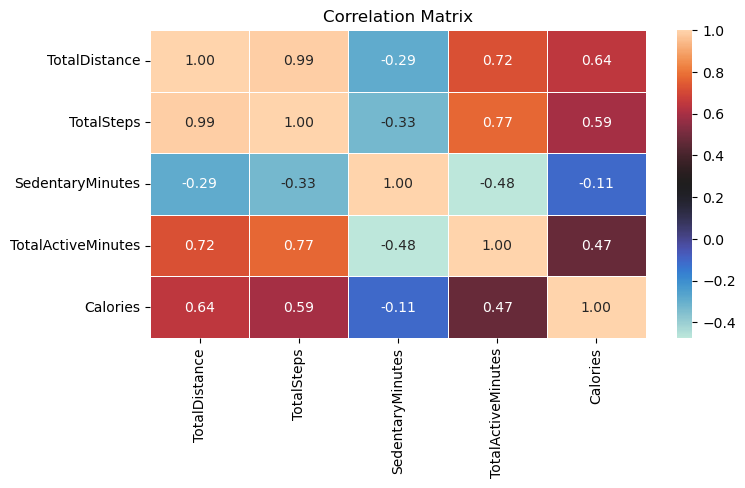

In [52]:
Corr1 = ["TotalDistance", "TotalSteps", "SedentaryMinutes", "TotalActiveMinutes", "Calories"]

plt.figure(figsize=(8, 4))
sns.heatmap(daily_activity[Corr1].corr(), 
            annot=True, 
            fmt=".2f",
            linewidths=0.5,
            cmap="icefire")
plt.title('Correlation Matrix')
plt.show()


* There is a positive correlation between Calories and TotalActiveMinutes.
* There is a negative correlation between Calories and SedentaryMinutes.

Using **Scatter Plot** to observe the relation between TotalSteps and  SedentaryMinutes to calories

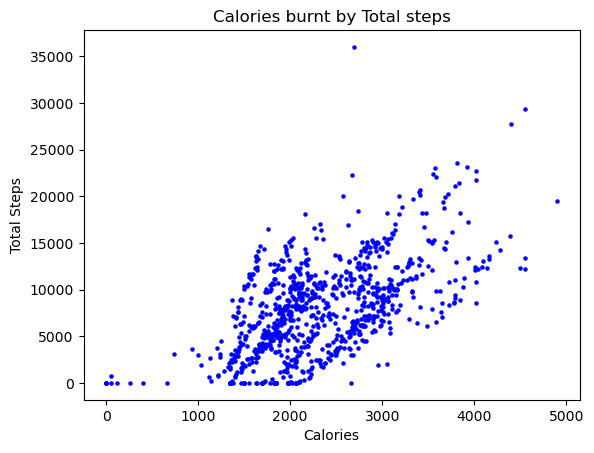

In [53]:
TotalSteps_calories = plt.scatter(x = daily_activity["Calories"],\
                                  y = daily_activity["TotalSteps"], color = "Blue",s=5 )
plt.title("Calories burnt by Total steps")
plt.xlabel("Calories")
plt.ylabel("Total Steps")
plt.show()

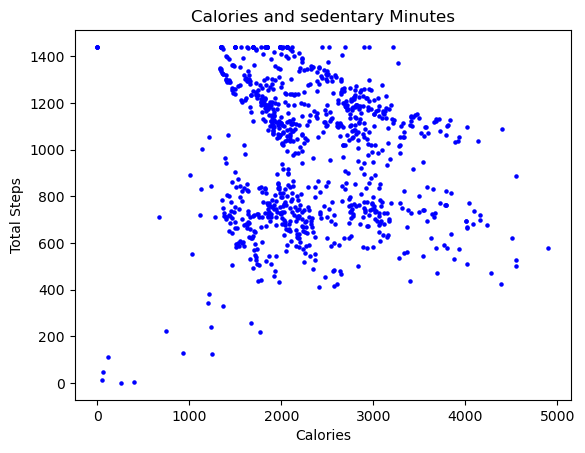

In [54]:
SedentaryMinutes_calories = plt.scatter(x = daily_activity["Calories"],\
                                  y = daily_activity["SedentaryMinutes"], color = "Blue", s=5 )
plt.title("Calories and sedentary Minutes")
plt.xlabel("Calories")
plt.ylabel("Total Steps")
plt.show()

This scatterplot offers a more distinct perspective on the relationship between TotalSteps and SedentaryMinutes concerning Calories. It becomes evident that as the number of steps taken increases, the corresponding calories burnt also increase. Conversely, when SedentaryMinutes rise, there is a noticeable decrease in the calories burnt.

**Sedentary Minutes** vs **Active Minutes**

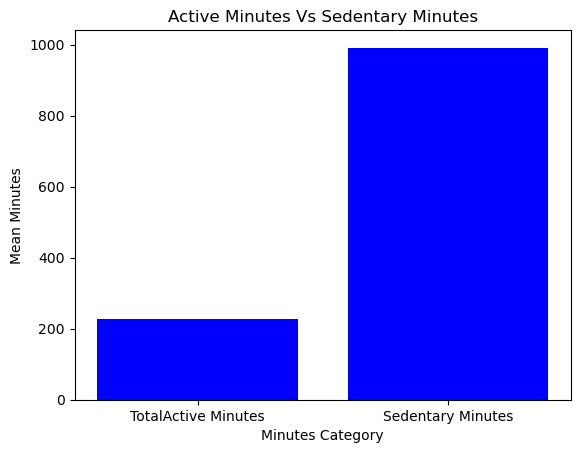

In [55]:
x = ["TotalActive Minutes", "Sedentary Minutes"]
y = [daily_activity["TotalActiveMinutes"].mean(), daily_activity["SedentaryMinutes"].mean()]

plt.bar(x, y, color="blue")
plt.title("Active Minutes Vs Sedentary Minutes")
plt.xlabel("Minutes Category")
plt.ylabel("Mean Minutes")
plt.show()

There exists a substantial disparity between SedentaryMinutes and TotalActiveMinutes. Evidently, users allocate considerably more time to sedentary activities than to active ones. This observation may offer insights into their occupation or lifestyle, possibly indicating a prevalence among the working class spending extended periods seated at desks.

Calories Burnt on differt day of the week

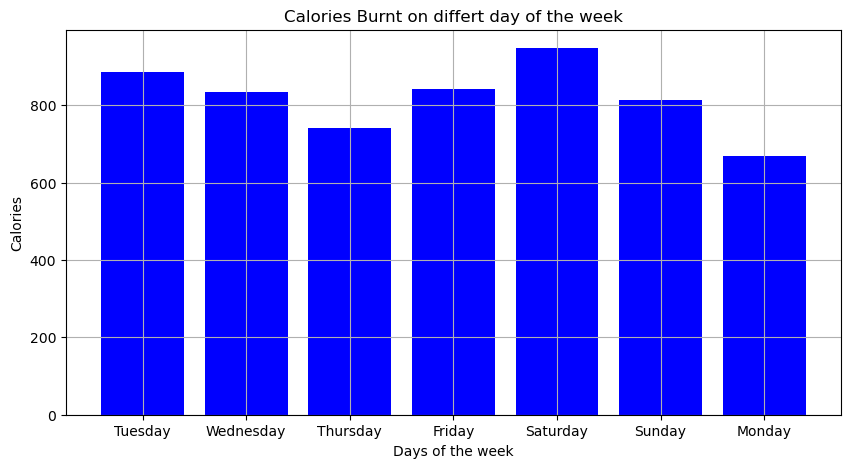

In [56]:
fig, ax = plt.subplots(figsize=(10,5))
plt.bar(hourly_merged["Day_of_the_week"],hourly_merged["Calories"],color = "Blue")

plt.xlabel("Days of the week")
plt.ylabel("Calories")
plt.title("Calories Burnt on differt day of the week")
plt.grid()
plt.show()

* The bar plot illustrates a notable trend where the highest calorie burn is observed on Saturdays, while the lowest occurs on Mondays.
* This pattern aligns with the common understanding that weekends like Saturdays often offer more leisure time for exercise and physical activities.
* However, the unexpected lower calorie burn on Mondays raises questions, considering that Mondays are often associated with increased work commitments.
* One potential explanation could be that users are heavily occupied with work-related tasks on Mondays, limiting opportunities for physical activity and exercise.
* This observation prompts the consideration that individuals might be spending prolonged periods at their desks on Mondays, potentially impacting their overall activity levels.

How many **steps** are taken on each **day of the week** using bar plot

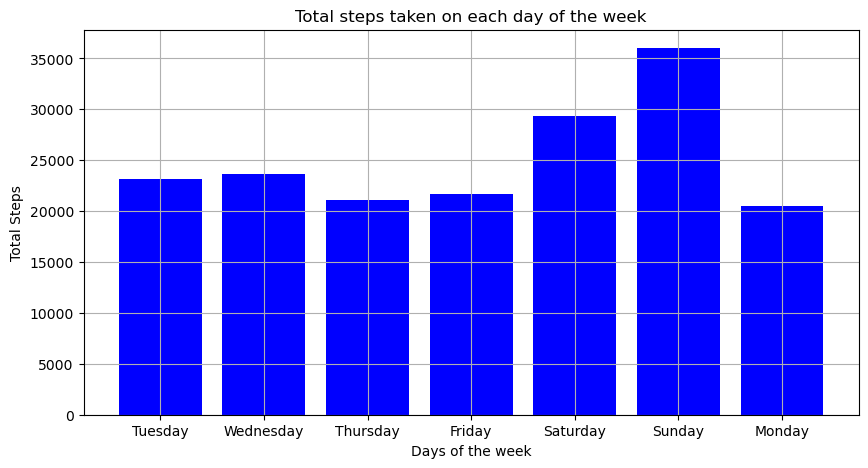

In [57]:
fig, ax = plt.subplots(figsize = (10,5))
plt.bar(daily_activity["Day_of_the_week"],daily_activity["TotalSteps"],color = "Blue")

plt.xlabel("Days of the week")
plt.ylabel("Total Steps")
plt.title("Total steps taken on each day of the week")
plt.grid()
plt.show()

* This analysis provides a comprehensive understanding of the reason behind Monday's lower calorie burn, revealing a significant contrast in step count compared to other days of the week.
* On Monday, users took notably fewer steps, suggesting a higher probability of prolonged periods spent seated at their workstations.
* The observed trend also offers insights into the demographic profile of the survey participants, indicating a strong likelihood that they belong to the working class.
* In contrast, the weekend days, Saturday and Sunday, stand out as having the highest step counts, aligning well with expectations and reflecting higher levels of physical activity.

How many **hours of sleep**, each **day of the week** using bar plot

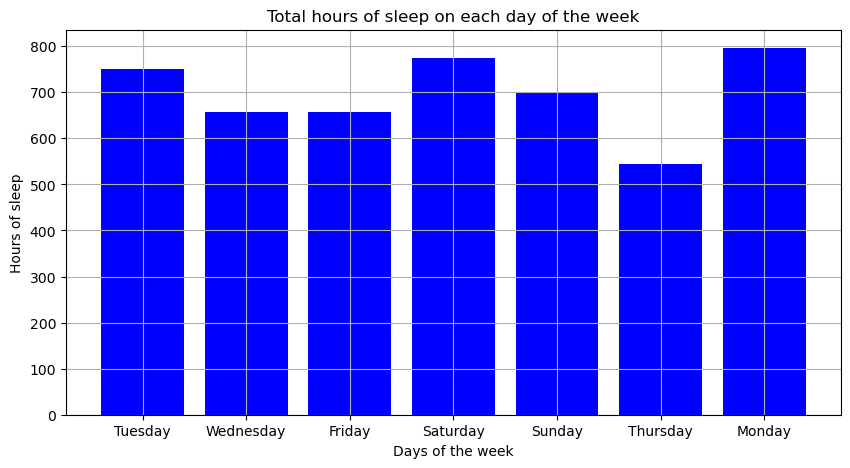

In [58]:
fig, ax = plt.subplots(figsize = (10,5))
plt.bar(sleep_hourly_merged["Day_of_the_week"],sleep_hourly_merged["TotalMinutesAsleep"],color = "Blue")

plt.xlabel("Days of the week")
plt.ylabel("Hours of sleep")
plt.title("Total hours of sleep on each day of the week")
plt.grid()
plt.show()

* The analysis reveals that Thursday recorded the least amount of sleep, while Monday saw the most extended sleep duration. This pattern suggests that individuals might compensate for exhaustion by sleeping longer.
* Interestingly, Saturday, Tuesday, and Sunday also stand out as days with extended sleep hours, coinciding with higher calorie loss on those days.
* This observation implies a potential connection between increased sleep duration and greater physical activity, as indicated by the correlation between extended sleep on these days and higher calorie expenditure.

what are the most **active hours of the day**?

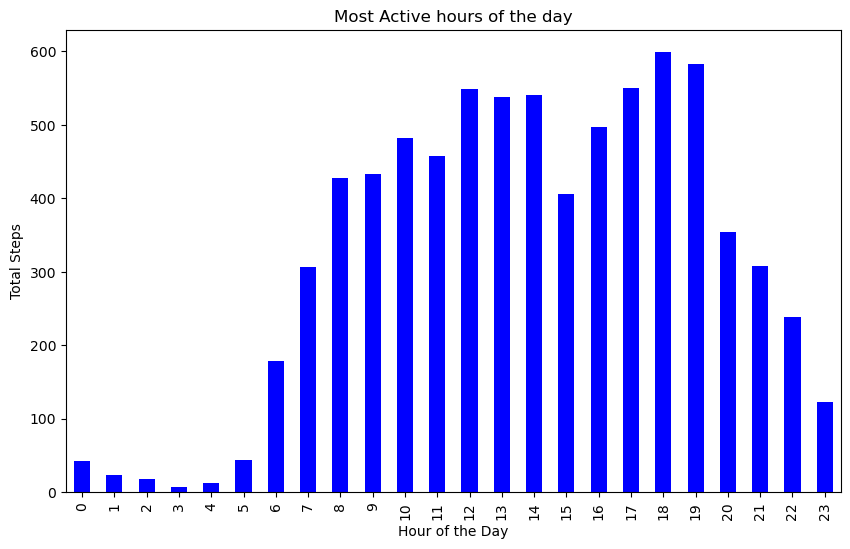

In [59]:
fig, axs = plt.subplots(figsize=(10, 6))
hourly_merged.groupby(hourly_merged['hour'])['StepTotal'].mean().plot(kind='bar',\
color='Blue', title='Most Active hours of the day')

plt.xlabel("Hour of the Day")
plt.ylabel("Total Steps")
plt.show()

This visualization highlights a noticeable surge in activity starting at 8 in the morning and extending until 7 in the evening. The hours between 8 p.m. and 10 p.m. represent the least active period of the day. These hours potentially present an opportune window for targeted ad campaigns, given their reduced activity levels.

# **6.Act**

**Recommendations:**

**Promotion:** Our analysis of the data underscores a trend of decreased activity between 8 and 10 p.m., indicating a suitable time frame for Bellabeat to strategically schedule advertising campaigns. Leveraging platforms like Google AdWords with ad scheduling can effectively reach our target audience during these hours, optimizing the impact of our promotions. Such scheduling not only enhances our out reach but also contributes to cost-effective advertising.

**Retention:** Beyond acquiring new members, maintaining their loyalty is paramount. Studies indicate that a significant percentage of subscribers cancel memberships within the first two years. To enhance retention, Bellabeat should focus on tailored content that adds value. Our data reveals a positive connection between step count and calorie expenditure. By offering tips to attain daily step goals and proposing engaging challenges, we can inspire our users toward healthier routines. This approach cultivates engagement and delivers tangible benefits to our community.

A notable observation is the prevalence of sedentary behavior, associated with various health issues. To address this, Bellabeat can employ informative videos and blogs to educate users about the risks of prolonged inactivity and methods to mitigate them. This initiative also provides an avenue to introduce our product ecosystem, including the Bellabeat app and Time, which empower users with holistic insights for improved well-being.